<p align="center">
  <img width="300" height="290" src="https://i.imgur.com/mu6ZuGT.jpg">
</p>

<h1><b>TC4033</b></h1>
<h1><b>Visión computacional para imágenes y video</b></h1>
<h3><b>10. Clustering Mean Shift</b></h3>
<h3><b>Docentes:</b> Dr. Gilberto Ochoa Ruiz, Mtra. María Guadalupe Marcos Abularach</h3>

<h2><b>Equipo 30:</b></h2>

- Julio Baltazar Colín: A01794476
- Helmy Andrea Moreno Navarro: A01793918
- Maricel Parra Osorio - A01793932
- Yeison Fernando Villamil Franco: A01793803


# **Implementación de Clustering(Mean Shift)**




Mean Shift es un método de búsqueda iterativa que busca los modos en los datos mediante la maximización de la estimación de densidad del kernel (KDE). Este enfoque consiste en estimar la función de densidad de probabilidad de una variable aleatoria. La KDE es un proceso de suavizado de datos que asigna pesos a cada punto de datos, conocidos como núcleos, siendo uno de los más comunes el núcleo gaussiano. La función de densidad resultante es una superficie de probabilidad cuya variación depende del ancho de banda utilizado.

Este algoritmo se emplea en tareas de aprendizaje no supervisado, como la agrupación o Clustering. El nombre "Mean Shift" proviene del hecho de que en cada iteración, hay un cambio en la "media". Es ampliamente utilizado en el análisis de datos del mundo real debido a su naturaleza no paramétrica y su capacidad para identificar grupos sin la necesidad de una estructura predefinida en el espacio de características. Además, en el ámbito de la visión computacional, se utiliza especialmente en la segmentación de imágenes y su procesamiento.

En el contexto de la segmentación de imágenes, el algoritmo considera cada píxel de la imagen, determinando un conjunto de píxeles vecinos dentro de un radio espacial y una distancia de color definida. Luego, calcula el nuevo centro espacial y el nuevo valor medio de color para este conjunto de píxeles vecinos. Estos valores servirán como el nuevo centro para la próxima iteración, repitiendo el proceso hasta que los centros dejen de cambiar significativamente. Al finalizar, se asigna el color medio final a la posición inicial de esa iteración.

En resumen, el algoritmo de Mean Shift generalmente considera tres variables de entrada: una función de distancia, un radio que determina la vecindad de los píxeles y una diferencia de valor que define los píxeles considerados para el cálculo de la media.

Además, podemos ubicar fácilmente la media aritmética de todo el conjunto de datos al calcular la media aritmética de cada una de las variables, lo que se representa gráficamente mediante el punto rojo. En este contexto, se parte del supuesto de que el peso de todas las variables es igual. Sin embargo, también es posible emplear la media ponderada para asignar un peso diferente a cada variable, utilizando la siguiente fórmula:

$$ \text{Media ponderada} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i} $$



Donde w_i representa el peso de la variable x_i. En el método Mean Shift, el parámetro que requiere ajuste manual es el tamaño del radio, a través del cual el algoritmo calcula la media de todos los puntos que se encuentran dentro del radio establecido. Por ejemplo, si deseamos calcular la media ponderada para el área alrededor del punto O, que en realidad abarca cada píxel de la imagen, podemos considerar una función de ponderación plana, la cual se representa como un círculo con un radio fijo R centrado en O. Todos los puntos dentro de este círculo son considerados en el cálculo, mientras que aquellos fuera del círculo son ignorados. Esto se ilustra en la siguiente imagen, donde nuevamente el punto negro representa el píxel que estamos analizando, mientras que el punto rojo representa la media de todos los puntos que se encuentran dentro del círculo con radio R.

## Importing Libraries

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
import string
import pandas as pd
import cv2 as cv2
import os
import seaborn as sns



%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


## Implementación de Clustering(Mean Shift)

In [ ]:
def MeanShiftFunc(img, quantile):
    # Filtrar para reducir el ruido
    img = cv2.medianBlur(img, 3)

    # Aplanar la imagen
    flat_image = img.reshape((-1,3))
    flat_image = np.float32(flat_image)

    # Calcular el ancho de banda
    bandwidth = estimate_bandwidth(flat_image, quantile=quantile, n_samples=3000)

    # Aplicar el algoritmo MeanShift
    ms = MeanShift(bandwidth=bandwidth, max_iter=800, bin_seeding=True)
    ms.fit(flat_image)
    labeled = ms.labels_

    # Obtener el número de segmentos
    segments = np.unique(labeled)

    # Calcular el color promedio de cada segmento
    total = np.zeros((segments.shape[0], 3), dtype=float)
    count = np.zeros(total.shape, dtype=float)
    for i, label in enumerate(labeled):
        total[label] = total[label] + flat_image[i]
        count[label] += 1
    avg = total/count
    avg = np.uint8(avg)

    # Asignar el color promedio al segmento correspondiente
    res = avg[labeled]
    result = res.reshape((img.shape))

    return (result, segments.shape[0])


In [ ]:
from io import BytesIO
import requests

def imagen_desde_url(url):
  # Obtener la imagen desde la URL
  response = requests.get(url)
  img_data = BytesIO(response.content)

  # Decodificar los datos de la imagen y convertir a matriz de imagen
  image = cv2.imdecode(np.frombuffer(img_data.read(), np.uint8), 1)

  # Convertir la imagen de BGR a RGB (ya que OpenCV carga imágenes en formato BGR por defecto)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  return image


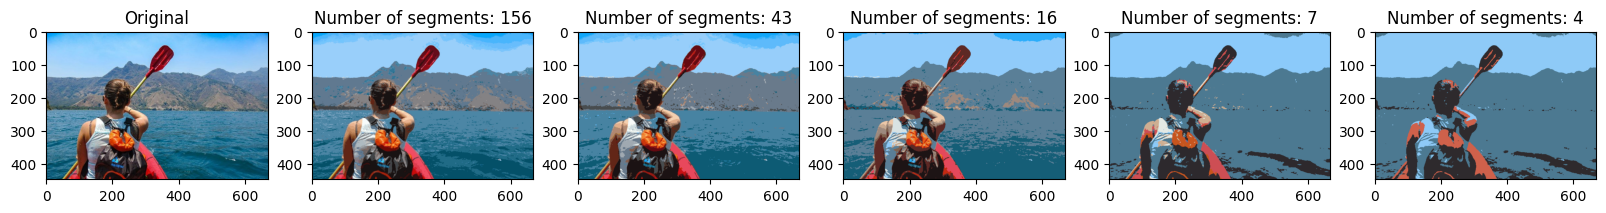

In [ ]:
url = 'https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_9/lago.jpg?raw=true'
img = imagen_desde_url(url)

quantile_size = [0.0125, 0.0256, 0.06, 0.12, 0.2]

x = 1
plt.figure(figsize=(20, 20))
for qua_value in quantile_size:
    if x == 1:
        plt.subplot(1, len(quantile_size) + 1, x)
        plt.imshow(img)
        plt.title("Original")
        x = x + 1
    mean_image, segment = MeanShiftFunc(img, qua_value)
    plt.subplot(1, len(quantile_size) + 1, x)
    plt.imshow(mean_image)
    plt.title("Number of segments: {}".format(segment))
    x = x + 1

plt.show()


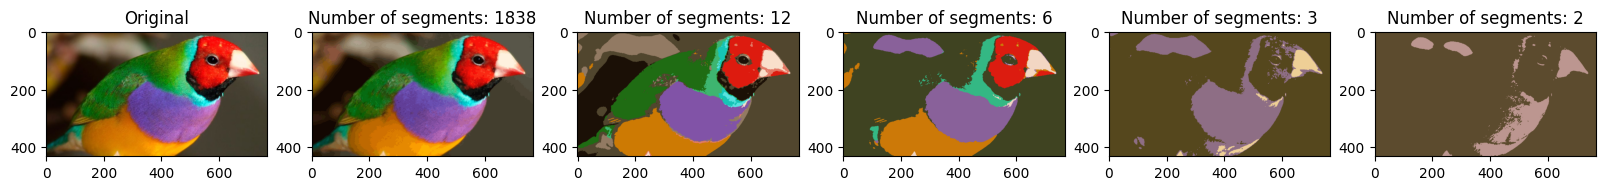

In [ ]:
url = 'https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_9/pajaro.jpg?raw=true'
img = imagen_desde_url(url)

quantile_size = [0.002, 0.06, 0.12, 0.2, 0.3]

plt.figure(figsize=(20, 20))
plt.subplot(1, len(quantile_size) + 1, 1)
plt.imshow(img)
plt.title("Original")

x = 2
for qua_value in quantile_size:
    mean_image, segment = MeanShiftFunc(img, qua_value)
    plt.subplot(1, len(quantile_size) + 1, x)
    plt.imshow(mean_image)
    plt.title("Number of segments: {}".format(segment))
    x = x + 1

plt.show()


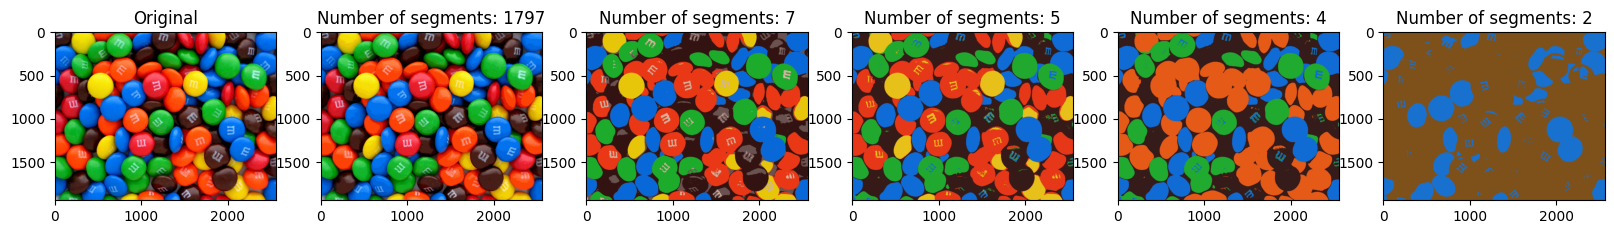

In [ ]:
url = 'https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_9/m&m.jpg?raw=true'
img = imagen_desde_url(url)

quantile_size = [0.002, 0.06, 0.12, 0.2, 0.3]

plt.figure(figsize=(20, 20))
plt.subplot(1, len(quantile_size) + 1, 1)
plt.imshow(img)
plt.title("Original")

x = 2
for qua_value in quantile_size:
    mean_image, segment = MeanShiftFunc(img, qua_value)
    plt.subplot(1, len(quantile_size) + 1, x)
    plt.imshow(mean_image)
    plt.title("Number of segments: {}".format(segment))
    x = x + 1

plt.show()


Se puede observar que, al probar el algoritmo con diferentes imágenes, Mean Shift muestra una debilidad en comparación con otros modelos de segmentación. Cuando la imagen tiene una alta saturación de colores o se busca dividir en un gran número de clusters, la convergencia o búsqueda de centroides se vuelve computacionalmente complicada.

A continuación, presentamos una demostración utilizando un código donde Mean Shift se esfuerza para agrupar la imagen correctamente:

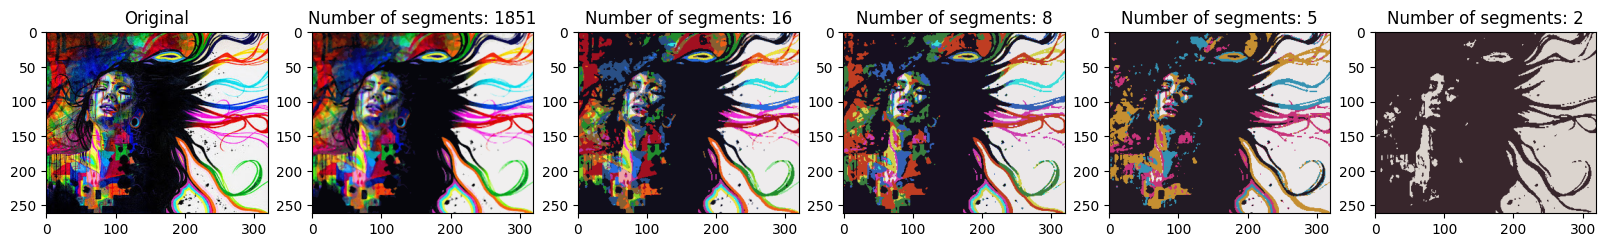

In [ ]:
url = 'https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_9/pintura.jpg?raw=true'
img = imagen_desde_url(url)

quantile_size = [0.002, 0.06, 0.12, 0.2, 0.3]

plt.figure(figsize=(20, 20))
plt.subplot(1, len(quantile_size) + 1, 1)
plt.imshow(img)
plt.title("Original")

x = 2
for qua_value in quantile_size:
    mean_image, segment = MeanShiftFunc(img, qua_value)
    plt.subplot(1, len(quantile_size) + 1, x)
    plt.imshow(mean_image)
    plt.title("Number of segments: {}".format(segment))
    x = x + 1

plt.show()


## Conclusiones <a class="anchor" id="Implementación de Clustering" ></a>

* MeanShift es un algoritmo de segmentación no supervisado que aprovecha la densidad de datos para identificar grupos dentro de un conjunto de datos. Este método desplaza una ventana sobre cada punto de los datos, calculando el centroide de los puntos dentro de esa ventana. Luego, utiliza este centroide como el nuevo centro de la ventana y repite el proceso hasta alcanzar la convergencia.

* Básicamente se pueden identificar cuatro pasos generales para este algoritmo:

1. Se elige un conjunto de puntos semilla (también llamados "centroides").
2. Para cada punto semilla, se calcula el vector de desplazamiento promedio ponderado hacia las regiones de alta densidad.
3. Se ajusta la posición del punto semilla según el vector de desplazamiento calculado.
4. Se repiten los pasos 2 y 3 hasta que los puntos semilla converjan a los modos de la distribución de probabilidad.

* El resultado final del algoritmo Mean Shift es un conjunto de puntos semilla que representan los modos de la distribución de probabilidad en el espacio de características. Estos puntos semilla pueden usarse entonces como representantes de los diferentes clústeres o segmentos en la imagen.

* Una de las principales ventajas de MeanShift es su capacidad para identificar el número de grupos en los datos sin necesidad de conocimiento previo. Además, es robusto ante formas y tamaños irregulares, así como ante datos ruidosos. Sin embargo, MeanShift puede ser exigente computacionalmente, especialmente en conjuntos de datos extensos. Además, la elección del ancho de banda de la ventana puede ser un desafío y puede influir considerablemente en los resultados de la segmentación.

* El algoritmo Mean Shift también es útil para la eliminación de ruido en imágenes donde el detalle lineal y las formas definidas son más importantes que los detalles finos; en estos casos, Mean Shift destaca por mantener las líneas definidas sin ocasionar abultamientos en las intersecciones.

* A diferencia de otros algoritmos de segmentación, como el algoritmo de k-medias (K-Means), que requiere un número predeterminado de clústeres y donde cada píxel se asigna a un clúster específico, Mean Shift es un algoritmo de agrupamiento basado en la densidad que no requiere que se especifique el número de clústeres de antemano.

* El algoritmo Mean Shift tiende a producir segmentaciones suaves y agrupamientos no lineales, lo que puede no ser ideal para datos que tienen estructuras lineales claras o formas definidas, como ventanas o cercas, en cuyo caso otros algoritmos de segmentación podrían proporcionar mejores resultados.

* Finalmente, podemos concluir que MeanShift es un método útil y eficaz en muchos casos de segmentación, pero es crucial considerar sus limitaciones y ajustar cuidadosamente los parámetros al aplicarlo a un problema específico.

## Referencias <a class="anchor" id="Implementación de Clustering" ></a>

1. Comaniciu, D., & Meer, P. (2002). Mean shift: A robust approach toward feature space analysis. IEEE Transactions on Pattern Analysis and Machine Intelligence, 24(5), 603-619.

2. Cheng, Y., Mean Shift, Métodos de Segmentación, 2020. Disponible en: https://medium.com/@a01793132/clustering-mean-shift-m%C3%A9todos-de-segmentaci%C3%B3n-f5523da4f539